# Exploring presidential commericals

The Internet Archive.

In [2]:
import agate

In [3]:
tester = agate.TypeTester(limit=100)
commercials = agate.Table.from_csv('../../Data/commercials.csv', column_types=tester)

In [4]:
print(commercials)

|----------------+---------------|
|  column_names  | column_types  |
|----------------+---------------|
|  wp_identifier | Number        |
|  network       | Text          |
|  market        | Text          |
|  location      | Text          |
|  program       | Text          |
|  program_type  | Text          |
|  start_time    | Date          |
|  end_time      | Date          |
|  archive_id    | Text          |
|  embed_url     | Text          |
|  sponsor       | Text          |
|  sponsor_type  | Text          |
|  subject       | Text          |
|  candidate     | Text          |
|  type          | Text          |
|  message       | Text          |
|  air_count     | Number        |
|  market_count  | Number        |
|  date_created  | Date          |
|----------------+---------------|



In [5]:
commercials.print_table(max_rows=2)

|----------------+---------+--------+---------------------+-------------------+--------------+------------+------------+------------------------+--------------------------------------------------+---------------------------+---------------------+-----------------------------------+-------------+--------------+---------+-----------+--------------+---------------|
|  wp_identifier | network | market | location            | program           | program_type | start_time |   end_time | archive_id             | embed_url                                        | sponsor                   | sponsor_type        | subject                           | candidate   | type         | message | air_count | market_count | date_created  |
|----------------+---------+--------+---------------------+-------------------+--------------+------------+------------+------------------------+--------------------------------------------------+---------------------------+---------------------+------------------------

In [5]:
commercials_with_months = commercials.compute([
    ('month', agate.Formula(agate.Number(), lambda row: '%s' % row['start_time'].month))
])

In [6]:
by_market = commercials_with_months.group_by('market')

In [7]:
by_market_by_month = by_market.group_by('month')

In [8]:
market_month_totals = by_market_by_month.aggregate([
    ('count', agate.Length())
])

In [9]:
market_month_totals = market_month_totals.order_by(lambda row: (row['market'], row['month']))

In [10]:
market_month_totals.print_table()

|---------+-------+---------|
|  market | month |  count  |
|---------+-------+---------|
|  BOS    |     1 |  9,820  |
|  BOS    |     2 |  4,655  |
|  BOS    |     3 |     67  |
|  BOS    |    10 |      5  |
|  BOS    |    11 |    589  |
|  BOS    |    12 |  5,847  |
|  CAE    |     1 |  2,056  |
|  CAE    |     2 |  7,499  |
|  CAE    |    12 |    109  |
|  CID    |     1 | 10,820  |
|  CID    |     2 |    611  |
|  CID    |    10 |      4  |
|  CID    |    11 |    471  |
|  CID    |    12 |  3,848  |
|  CLE    |     1 |    246  |
|  CLE    |     2 |    287  |
|  CLE    |     3 |      7  |
|  CLT    |     2 |    134  |
|  COS    |     1 |     15  |
|  COS    |     2 |  1,088  |
|  COS    |     3 |     70  |
|  CVG    |     1 |    197  |
|  CVG    |     2 |    344  |
|  CVG    |     3 |     20  |
|  DEN    |     1 |     28  |
|  DEN    |     2 |  1,484  |
|  DEN    |     3 |     62  |
|  DSM    |     1 | 10,890  |
|  DSM    |     2 |    707  |
|  DSM    |     3 |      1  |
|  DSM    

In [12]:
by_candidate = commercials_with_months.group_by('candidate')

In [13]:
by_candidate_by_message = by_candidate.group_by('message')

In [14]:
by_candidate_by_message_by_market = by_candidate_by_message.group_by('market')

In [15]:
candidate_message = by_candidate_by_message.aggregate([
    ('count', agate.Length())
])

In [16]:
candidate_message_market = by_candidate_by_message_by_market.aggregate([
    ('count', agate.Length())
])

In [17]:
candidate_message.print_table()

|------------------------------------------------------------------------------------------+---------+---------|
|  candidate                                                                               | message |  count  |
|------------------------------------------------------------------------------------------+---------+---------|
|  Marco Rubio                                                                             | pro     | 11,306  |
|  Marco Rubio                                                                             | con     |  5,445  |
|  Marco Rubio                                                                             | unknown |     15  |
|  Marco Rubio                                                                             | mixed   |     54  |
|  Bernie Sanders                                                                          | pro     | 24,530  |
|  Bernie Sanders                                                                          | con

In [69]:
by_candidate_by_message_by_market_by_date = by_candidate_by_message_by_market.group_by('start_time')

In [70]:
candidate_message_date_count = by_candidate_by_message_by_market_by_date.aggregate([
    ('count', agate.Length())
])

In [71]:
candidate_message_date_count = candidate_message_date_count.order_by('start_time')
candidate_message_date_count = candidate_message_date_count.compute([
    ('month', agate.Formula(agate.Number(), lambda row: '%s' % row['start_time'].month)),
    ('day', agate.Formula(agate.Number(), lambda row: '%s' % row['start_time'].day))
])

In [74]:
candidate_message_date_count = candidate_message_date_count.where(lambda row: row['month'] == 1)
candidate_message_date_count = candidate_message_date_count.where(lambda row: row['candidate'] != "John Kasich")

In [75]:
candidate_message_date_count.to_csv('candidate_message_date.csv')

In [29]:
desmoines = commercials.where(lambda row: row['market'] == "DSM")

In [38]:
desmoines_shows = desmoines.group_by('program')
dsm_program_count = desmoines_shows.aggregate([
    ('count', agate.Length())
])

In [44]:
shows = dsm_program_count.where(lambda row: row['count'] > 50)
print(len(shows.rows))

68


In [30]:
by_program = desmoines.group_by('program')

In [31]:
by_program_by_message = by_program.group_by('message')

In [32]:
program_message_count = by_program_by_message.aggregate([
    ('count', agate.Length())
])

In [45]:
dsm_shows = program_message_count.join(shows, 'program', 'program', inner=True)

In [48]:
dsm_shows.to_csv('dsm_shows.csv')

In [17]:
wheel.print_table()

|-------------------+---------+--------|
|  program          | message | count  |
|-------------------+---------+--------|
|  Wheel of Fortune | pro     | 1,097  |
|  Wheel of Fortune | mixed   |   324  |
|  Wheel of Fortune | con     |   218  |
|  Wheel of Fortune | unknown |    28  |
|-------------------+---------+--------|


In [33]:
program_message_count.to_csv('program_message_count.csv')

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.set(style="ticks")
%matplotlib inline

In [49]:
pmc = pd.read_csv('dsm_shows.csv')

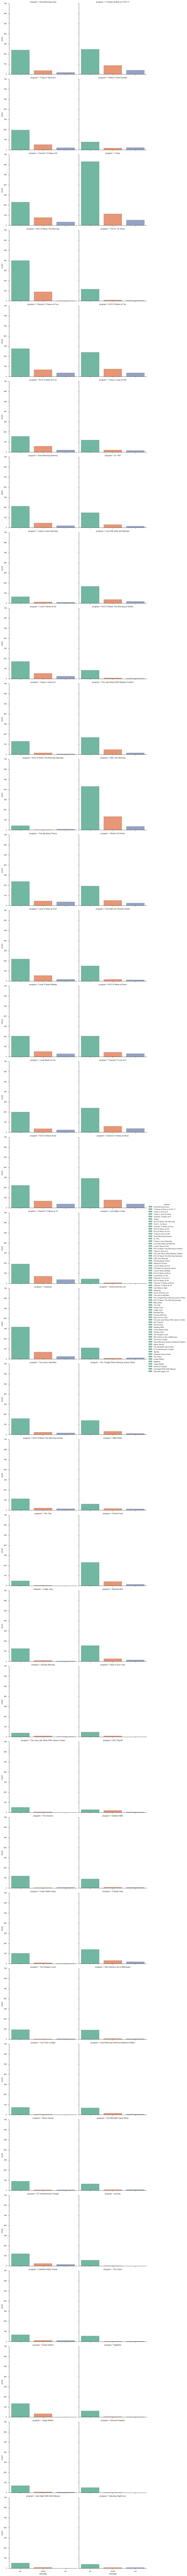

In [66]:
grid = sns.FacetGrid(pmc, col="program", hue="program", col_wrap=2, size=6)
grid.map(sns.barplot, "message", "count", palette="Set2").add_legend()

In [77]:
df = pd.read_csv('candidate_message_date.csv')

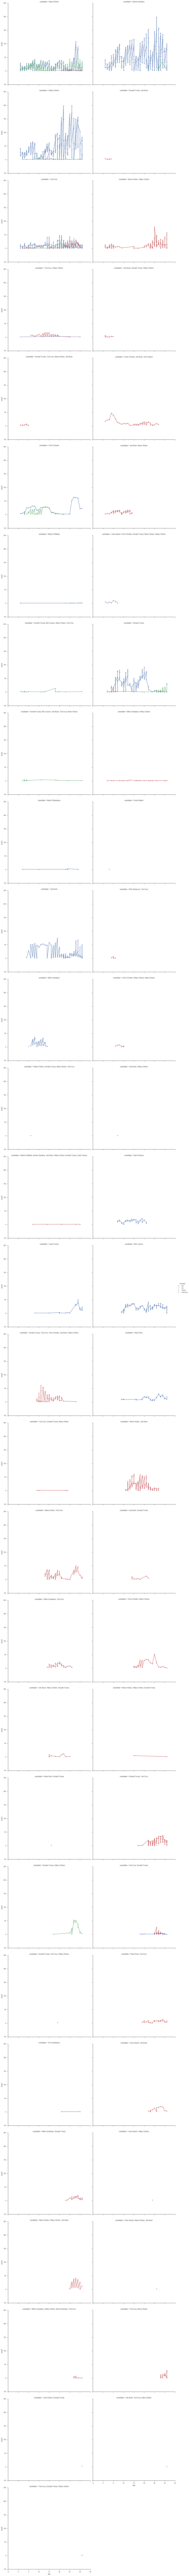

In [85]:
grid = sns.FacetGrid(df, col="candidate", hue="message", col_wrap=2, size=8, margin_titles=True)
grid.map(plt.scatter, "day", "count")
grid.map(plt.plot, "day", "count", marker="o", ms=4).add_legend()
